Problem - 1: Getting Started with Data Exploration - Some Warm up Exercises:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The first ten rows:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                   

<ipython-input-35-db4c1a74e5a3>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_countries, palette='viridis')


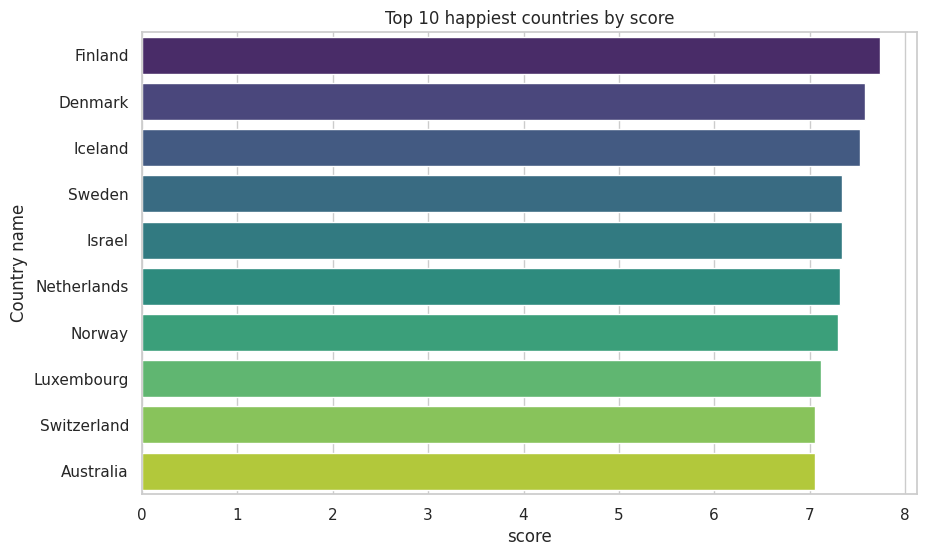

Line Plot: Top 10 unhappiest countries by Score


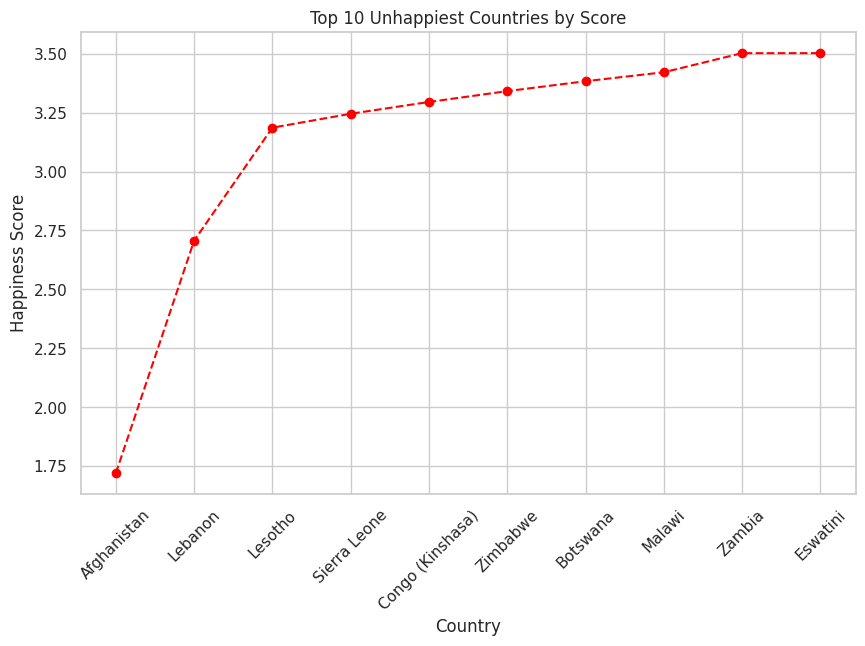

Histogram for Score distribution


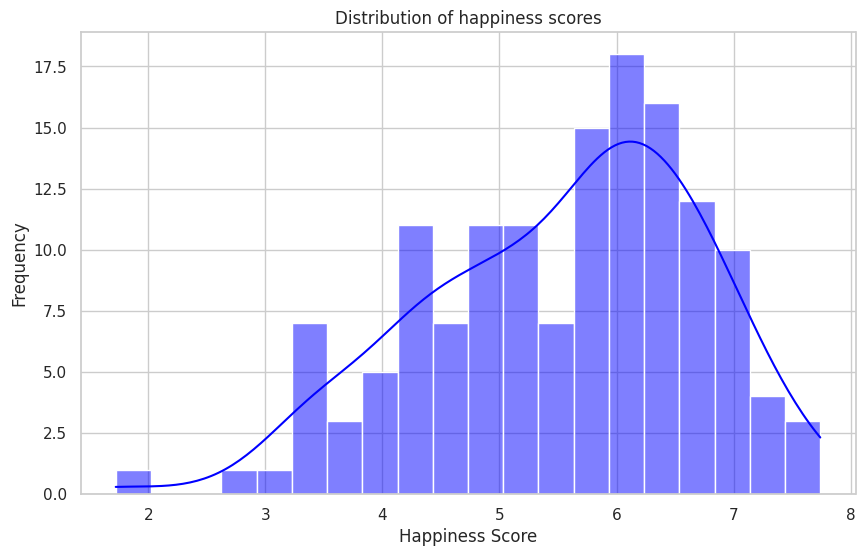

Scatter Plot: GDP per Capita vs Score


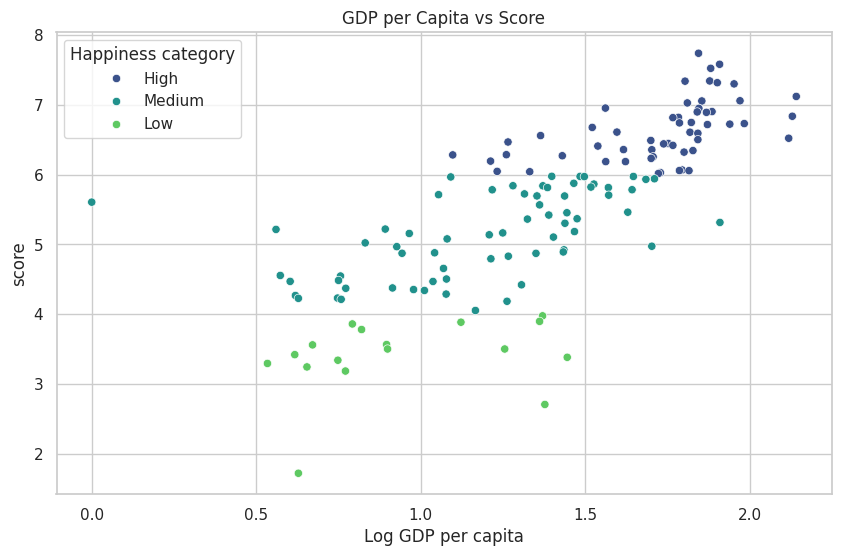

In [ ]:
#Load dataset
happiness_df = pd.read_csv('/content/drive/MyDrive/Conceopt of AI -- Assignment1/Copy of WHR-2024-5CS037.csv')

#................Dataset Overview:...........

#Display first 10 rows
print("The first ten rows:")
print(happiness_df.head(10))

#Identify the number of rows and columns in the dataset.
rows, cols = happiness_df.shape
print(f"Rows: {rows}, Columns: {cols}")

#List all the columns and their data types.
print("Columns and their data types:")
print(happiness_df.dtypes)

#.................Basic Statistics...............
mean_score = happiness_df['score'].mean()
median_score = happiness_df['score'].median()
std_score = happiness_df['score'].std()

print(f"Mean score: {mean_score}")
print(f"Median score: {median_score}")
print(f"Standard deviation of score: {std_score}")

#Identify the country with the highest and lowest happiness scores.
higgest_score_country = happiness_df.loc[happiness_df['score'].idxmax(), 'Country name']
lowest_score_country = happiness_df.loc[happiness_df['score'].idxmin(), 'Country name']

print(f"Country with highest happiness score: {higgest_score_country}")
print(f"Country with lowest happiness score: {lowest_score_country}")

#Missing values
missing_values = happiness_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

#Filtering and Sorting

#Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = happiness_df[happiness_df['score'] > 7.5]

#For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
sorted_filtered_df = filtered_df.sort_values(by='Log GDP per capita', ascending= False)
print("Top 10 countries with a GDP greater than 7.5:")
print(sorted_filtered_df.head(10))

#Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
def categorize_happiness(score):
  if (score < 4):
    return 'Low'
  elif ( 4 <= score <= 6):
    return 'Medium'
  else:
    return 'High'

happiness_df['Happiness category'] = happiness_df['score'].apply(categorize_happiness)
print(happiness_df[['Country name', 'score', 'Happiness category']])

#Data visualization

# Set the visual style
sns.set(style="whitegrid")

# Bar Plot: Top 10 happiest countries by Score
print("Bar Plot: Top 10 happiest countries by Score")
top_10_countries = happiness_df.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_countries, palette='viridis')
plt.title('Top 10 happiest countries by score')
plt.xlabel('score')
plt.ylabel('Country name')
plt.show()

# Line Plot: Top 10 unhappiest countries by Score
print("Line Plot: Top 10 unhappiest countries by Score")
top_10_unhappiest = happiness_df.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red', linestyle='--')
plt.title("Top 10 Unhappiest Countries by Score")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.show()

# Histogram for Score distribution
print("Histogram for Score distribution")
plt.figure(figsize=(10,6))
sns.histplot(happiness_df['score'], bins=20, color='Blue', kde= True )
plt.title('Distribution of happiness scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: GDP per Capita vs Scor
print("Scatter Plot: GDP per Capita vs Score")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=happiness_df, hue='Happiness category', palette='viridis')
plt.title('GDP per Capita vs Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('score')
plt.show()

Problem - 2 - Some Advance Data Exploration Task:

In [6]:
#Task - 1 - Setup Task - Preparing the South-Asia Dataset:

# List of South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives",
    "Nepal", "Pakistan", "Sri Lanka"
]

# Load the original dataset
happiness_df = pd.read_csv('/content/drive/MyDrive/Conceopt of AI -- Assignment1/Copy of WHR-2024-5CS037.csv')

# Step 2: Filter the dataset for South Asian countries
south_asian_data = happiness_df[happiness_df['Country name'].isin(south_asian_countries)]


# Step 3: Save the filtered dataframe to a new CSV file
south_asian_data.to_csv('south_asian_data.csv', index=False)

#output
print(south_asian_data.head())

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual  
92                       0.115                1.783  
107                      0.074                1.907  
125           

<ipython-input-7-d61b55ad0427>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite data', y='Country name', data=top_5_countries, palette='coolwarm')


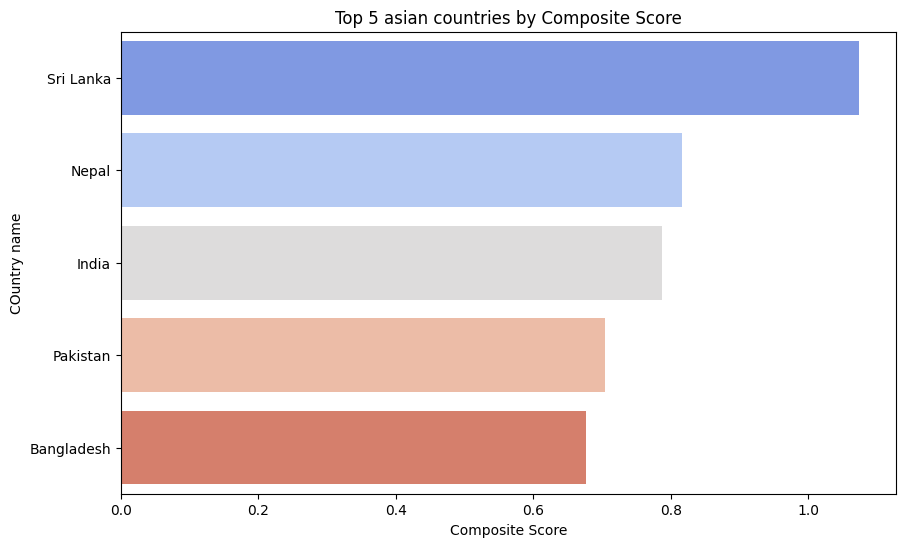

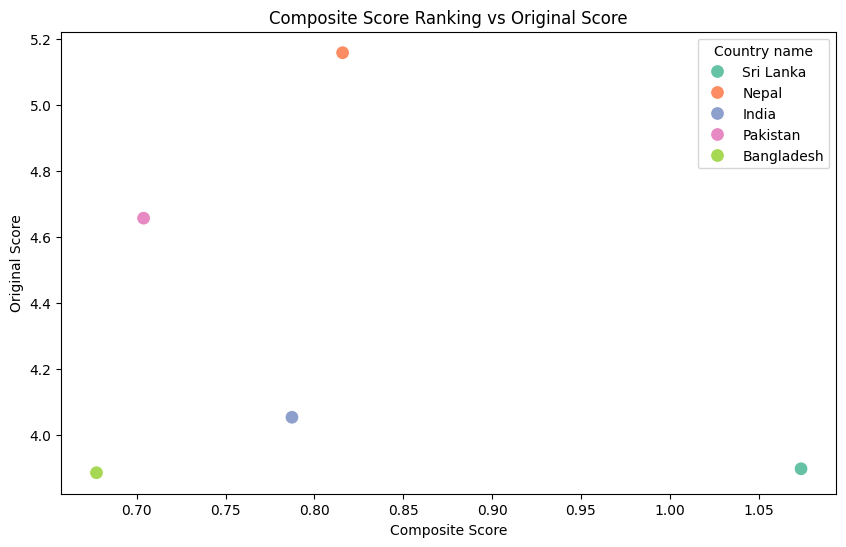

In [7]:
#Task - 2 - Composite Score Ranking:

# Load the South Asian dataset
south_asian_data = pd.read_csv('south_asian_data.csv')

# Step 1: Create the Composite Score column
south_asian_data['Composite data']= (
    0.40 * south_asian_data['Log GDP per capita'] +
    0.30 * south_asian_data['Social support'] +
    0.30 * south_asian_data['Healthy life expectancy']
)

# Step 2: Rank countries based on Composite Score in descending order
south_asian_data['Composite rank'] = south_asian_data['Composite data'].rank(ascending= False, method='min')

# Step 3: Visualize the top 5 countries using a horizontal bar chart
top_5_countries = south_asian_data.nlargest(5, 'Composite data')

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite data', y='Country name', data=top_5_countries, palette='coolwarm')
plt.title('Top 5 asian countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('COuntry name')
plt.show

# Step 4: Compare the Composite Score ranking with the original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite data', y='score', data=top_5_countries, hue='Country name', palette='Set2', s=100)
plt.title('Composite Score Ranking vs Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.show()

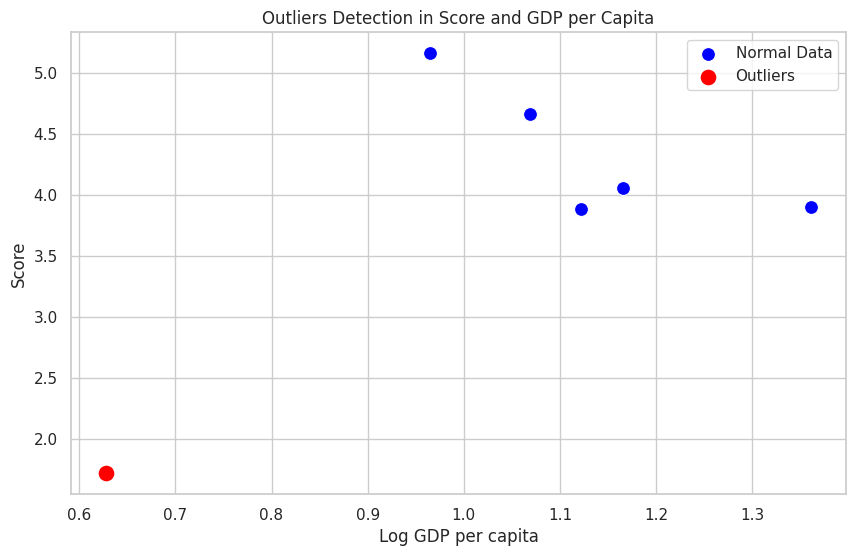

Characteristics of outliers
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628

Regional Average Score (Including Outliers): 3.90
Regional Average GDP per Capita (Including Outliers): 1.05
Regional Average Score (Excluding Outliers): 4.33
Regional Average GDP per Capita (Excluding Outliers): 1.14


In [ ]:
south_asian_data = pd.read_csv('south_asian_data.csv')

#Task - 3 - Outlier Detection:
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers, lower_bound, upper_bound

# Step 2: Detect outliers for 'Score' and 'Log GDP per capita'
score_outliers, score_lower, score_upper = detect_outliers(south_asian_data, 'score')
gdp_outliers, gdp_lower, gdp_upper = detect_outliers(south_asian_data, 'Log GDP per capita')

# Combine the outliers
combined_outliers = pd.concat([score_outliers, gdp_outliers]).drop_duplicates()

# Step 3: Create a scatter plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asian_data, label='Normal Data', color='Blue', s=100)
sns.scatterplot(x='Log GDP per capita', y='score', data=combined_outliers, label='Outliers', color='Red', s=150, marker='o')
plt.title('Outliers Detection in Score and GDP per Capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.show()


# Step 4: Discuss characteristics of outliers
print('Characteristics of outliers')
print(combined_outliers[['Country name', 'score', 'Log GDP per capita']])


# Step 5: Calculate the potential impact on regional averages
regional_avg_score = south_asian_data['score'].mean()
regional_avg_gdp = south_asian_data['Log GDP per capita'].mean()


impact_score = (south_asian_data['score'].sum() - combined_outliers['score'].sum()) / (len(south_asian_data) - len(combined_outliers))
impact_gdp = (south_asian_data['Log GDP per capita'].sum() - combined_outliers['Log GDP per capita'].sum()) / (len(south_asian_data) - len(combined_outliers))

print(f"\nRegional Average Score (Including Outliers): {regional_avg_score:.2f}")
print(f"Regional Average GDP per Capita (Including Outliers): {regional_avg_gdp:.2f}")
print(f"Regional Average Score (Excluding Outliers): {impact_score:.2f}")
print(f"Regional Average GDP per Capita (Excluding Outliers): {impact_gdp:.2f}")


 Pearson Correlation with Happiness score:
Freedom to make life choices: 0.80
Generosity: 0.87


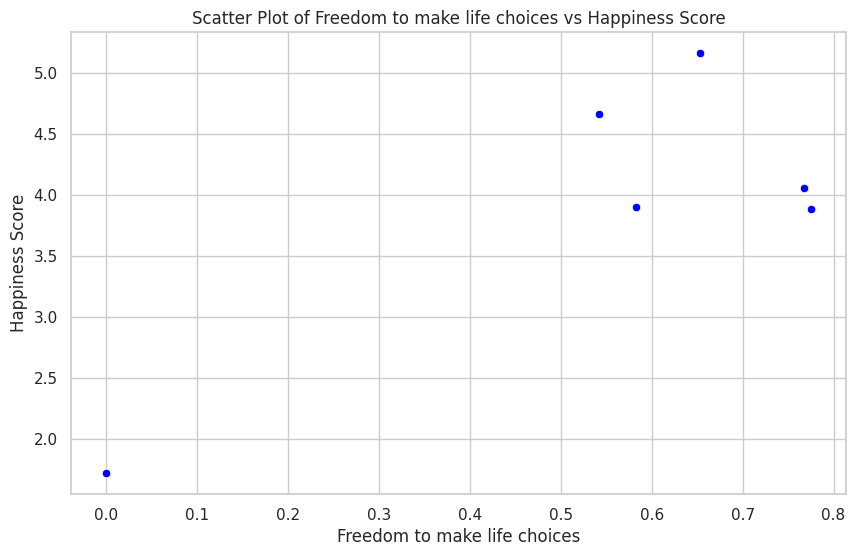

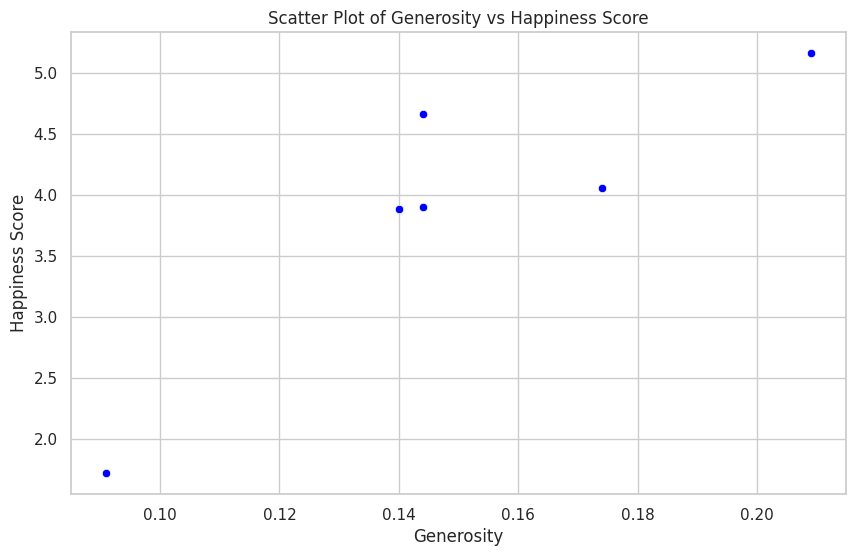


Discussions:
The strongest relationship is between Generosity and Happiness Score is 0.87
The weakest relationship is between Freedom to make life choices and Happiness Score is 0.80


In [ ]:
south_asian_data = pd.read_csv('south_asian_data.csv')

#Task - 4 - Exploring Trends Across Metrics:
metrics = ['Freedom to make life choices', 'Generosity']
correlations = {metric: south_asian_data['score'].corr(south_asian_data[metric]) for metric in metrics}


print('\n Pearson Correlation with Happiness score:')
for metric, corr_value in correlations.items():
  print(f"{metric}: {corr_value:.2f}")

for metric in metrics:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=metric, y='score', data=south_asian_data, color='blue')
  plt.title(f'Scatter Plot of {metric} vs Happiness Score')
  plt.xlabel(metric)
  plt.ylabel('Happiness Score')
  plt.show()

# Step 3: Identify and Discuss Relationships
strongest_metric = max(correlations, key=correlations.get)
weakest_metric = min(correlations, key=correlations.get)

print('\nDiscussions:')
print(f'The strongest relationship is between {strongest_metric} and Happiness Score is {correlations[strongest_metric]:.2f}')
print(f'The weakest relationship is between {weakest_metric} and Happiness Score is {correlations[weakest_metric]:.2f}')

Top 3 countries with largest positive gdp-score gap:
  Country name  Log GDP per capita  score  GDP-Score Gap
5  Afghanistan               0.628  1.721         -1.093
3    Sri Lanka               1.361  3.898         -2.537
4   Bangladesh               1.122  3.886         -2.764
Top 3 countries with largest negative gdp-score gap:
  Country name  Log GDP per capita  score  GDP-Score Gap
0        Nepal               0.965  5.158         -4.193
1     Pakistan               1.069  4.657         -3.588
2        India               1.166  4.054         -2.888


<ipython-input-10-f6fbe1cfa980>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


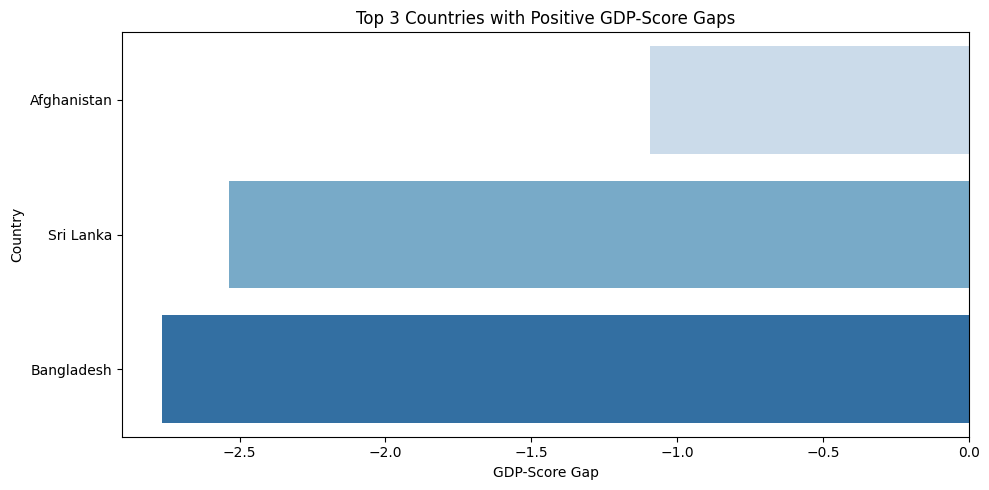

<ipython-input-10-f6fbe1cfa980>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


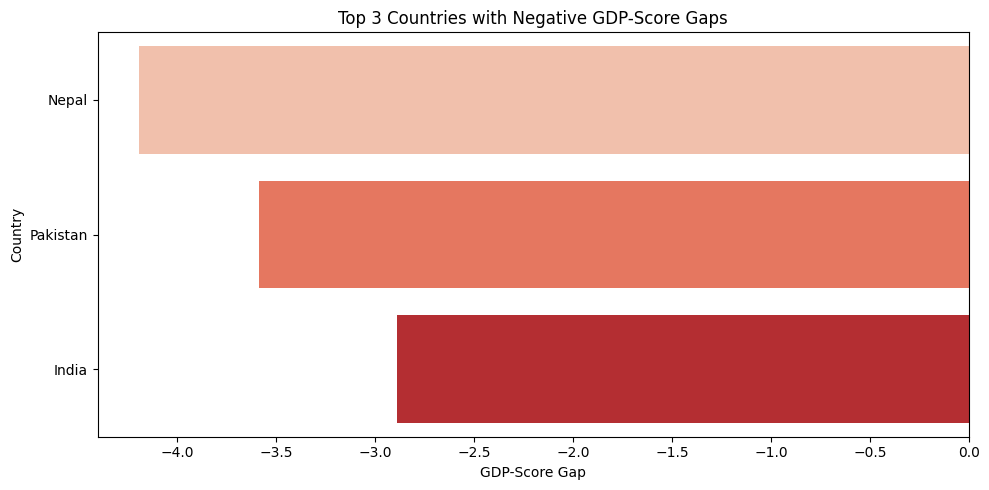

In [10]:
south_asia_data = pd.read_csv('south_asian_data.csv')

#Task - 5 - Gap Analysis:


# Step 1: Add a new column for GDP-Score Gap
south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']

# Step 2: Rank countries by GDP-Score Gap in ascending and descending order
ascending_gap = south_asian_data.sort_values(by='GDP-Score Gap')
descending_gap = south_asian_data.sort_values(by='GDP-Score Gap', ascending=False)

print("Top 3 countries with largest positive gdp-score gap:")
print(descending_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head(3))

print("Top 3 countries with largest negative gdp-score gap:")
print(ascending_gap[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']].head(3))

# Step 3: Visualize the top 3 positive and negative gaps using a bar chart
top_3_positive = descending_gap.head(3)
top_3_negative = ascending_gap.head(3)

gap_combined = pd.concat([top_3_positive, top_3_negative])

# Plot for Positive Gaps
plt.figure(figsize=(10, 5))
sns.barplot(
    x='GDP-Score Gap',
    y='Country name',
    data=top_3_positive,
    palette='Blues'
)
plt.title('Top 3 Countries with Positive GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Plot for Negative Gaps
plt.figure(figsize=(10, 5))
sns.barplot(
    x='GDP-Score Gap',
    y='Country name',
    data=top_3_negative,
    palette='Reds'
)
plt.title('Top 3 Countries with Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Problem - 3 - Comparative Analysis:

South asia mean score:3.90, std:1.18
Middle east mean score:5.41, std:1.57


<ipython-input-12-36961ddec238>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, bottom_3_sa]), ax=axs[0], palette='viridis')
<ipython-input-12-36961ddec238>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([top_3_me, bottom_3_me]), ax=axs[1], palette='viridis')


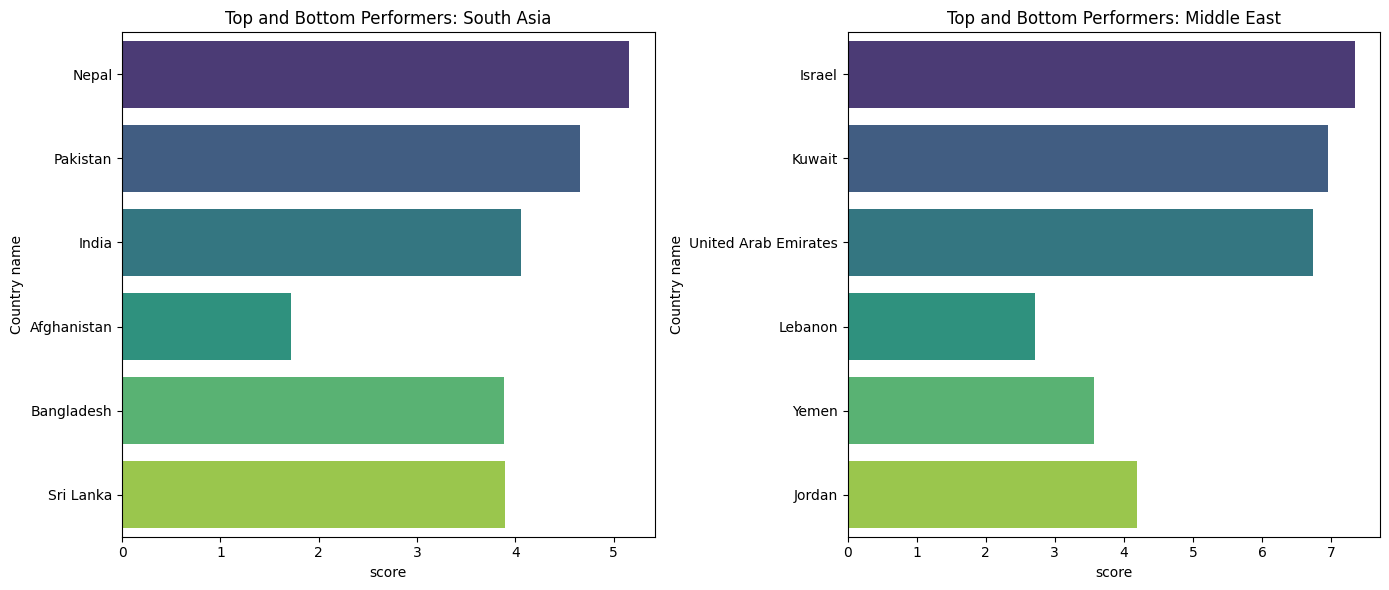

South Asia - Range: 3.44, CV:0.30
Middle East - Range: 4.63, CV:0.40

Correlations with Happiness Score (South Asia):
Freedom to make life choices    0.800519
Generosity                      0.874512
dtype: float64

Correlations with Happiness Score (Middle East):
Freedom to make life choices    0.863220
Generosity                      0.627524
dtype: float64


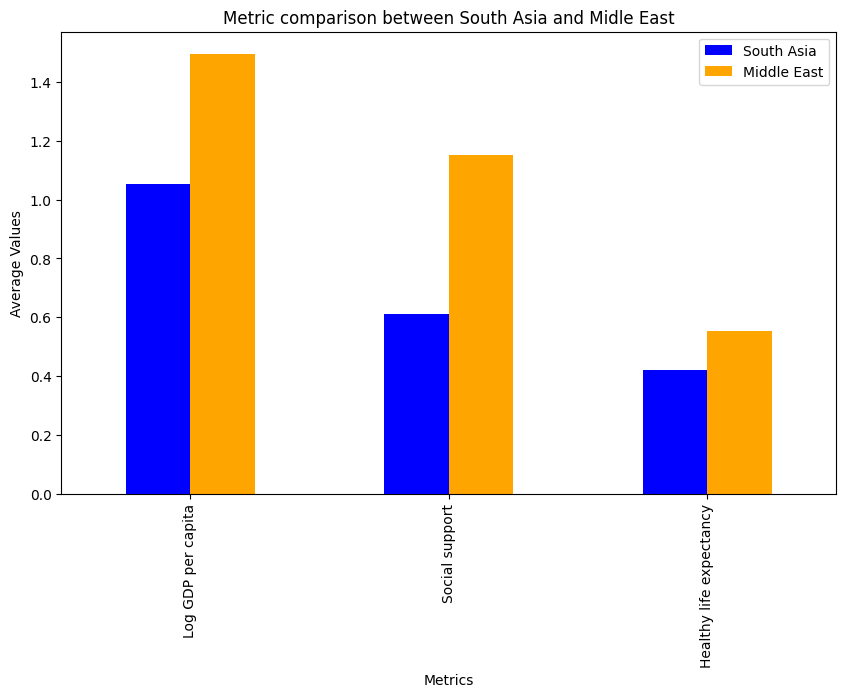

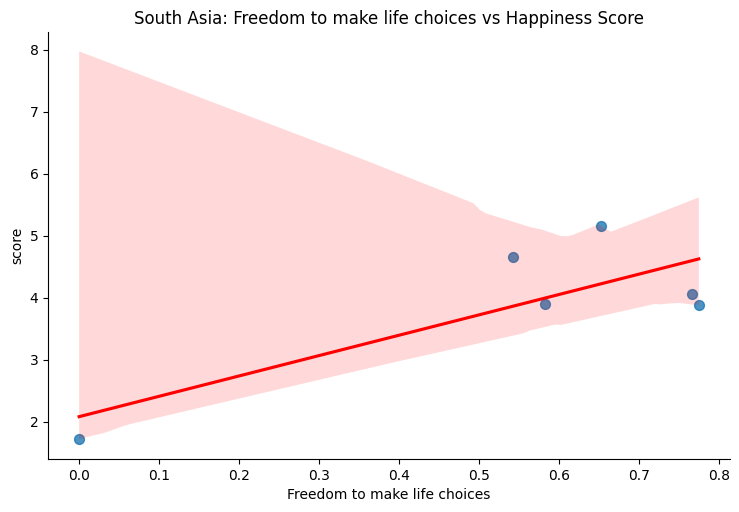

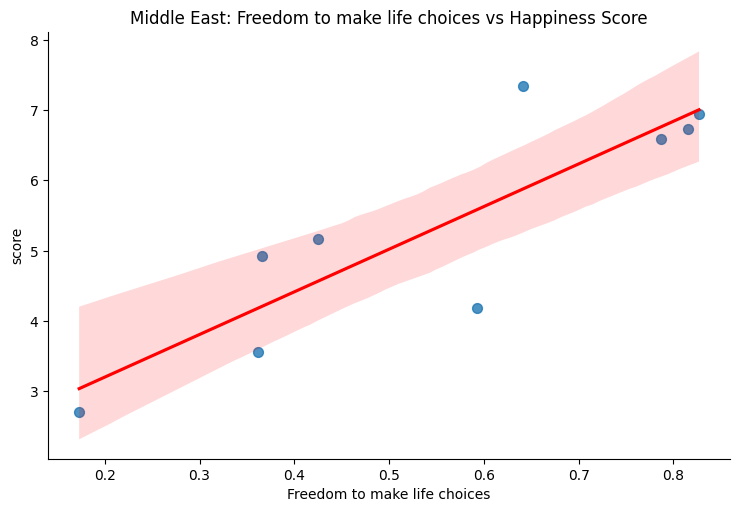

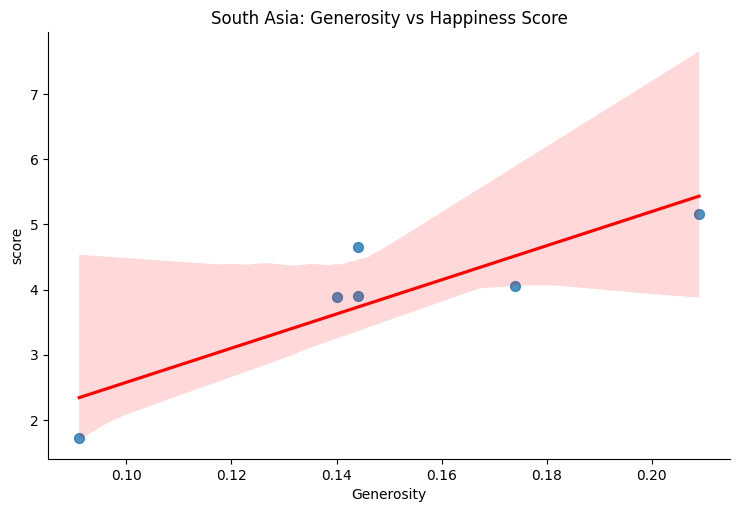

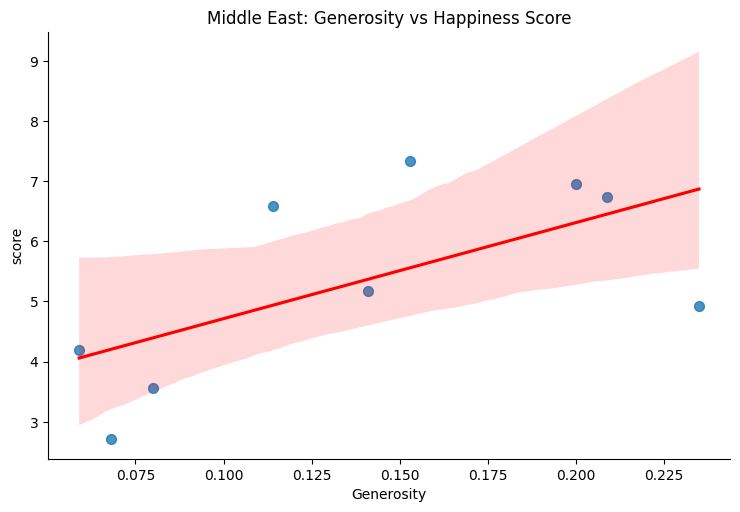

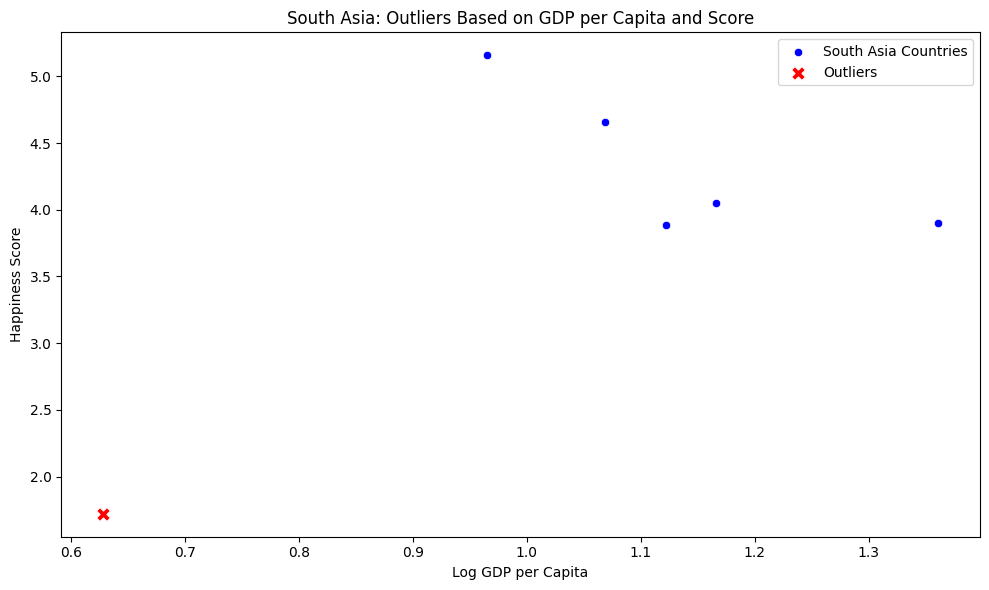

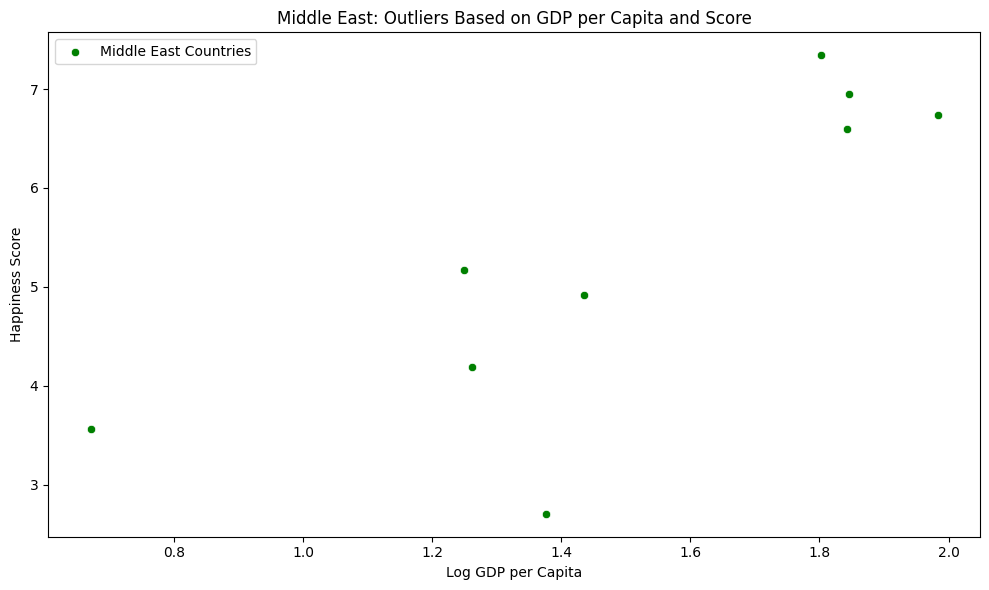

<ipython-input-12-36961ddec238>:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score', y='Region', data=pd.concat([south_asian_data.assign(Region='South Asia'), middle_east_data.assign(Region='Middle East')]), palette="coolwarm")


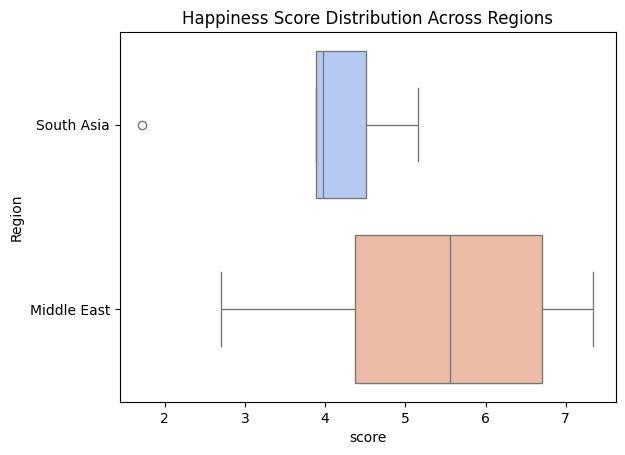

In [12]:
data = pd.read_csv('/content/drive/MyDrive/Conceopt of AI -- Assignment1/Copy of WHR-2024-5CS037.csv')

# Step 1: Create datasets for South Asia and Middle East
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

south_asian_data = data[data['Country name'].isin(south_asian_countries)]
middle_east_data = data[data['Country name'].isin(middle_eastern_countries)]

# Save datasets
south_asian_data.to_csv('south_asian_data.csv', index=False)
middle_east_data.to_csv('middle_east_data.csv', index=False)

# Step 2: Descriptive Statistics
south_asian_stats = south_asian_data['score'].describe()
middle_east_stats = middle_east_data['score'].describe()

print(f'South asia mean score:{south_asian_stats["mean"]:.2f}, std:{south_asian_stats["std"]:.2f}')
print(f'Middle east mean score:{middle_east_stats["mean"]:.2f}, std:{middle_east_stats["std"]:.2f}')

# Step 3: Top and Bottom Performers
top_3_sa = south_asian_data.nlargest(3, 'score')
bottom_3_sa = south_asian_data.nsmallest(3, 'score')
top_3_me = middle_east_data.nlargest(3, 'score')
bottom_3_me = middle_east_data.nsmallest(3, 'score')

# Bar Chart for Top and Bottom Performers
fig, axs = plt.subplots(1,2,figsize=(14,6))
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_sa, bottom_3_sa]), ax=axs[0], palette='viridis')
axs[0].set_title("Top and Bottom Performers: South Asia")
sns.barplot(x='score', y='Country name', data=pd.concat([top_3_me, bottom_3_me]), ax=axs[1], palette='viridis')
axs[1].set_title("Top and Bottom Performers: Middle East")
plt.tight_layout()
plt.show()

# Step 4: Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
mean_metrics_sa = south_asian_data[metrics].mean()
mean_metrics_me = middle_east_data[metrics].mean()

comparison_df = pd.DataFrame({'Metrics':metrics,'South Asia': mean_metrics_sa,'Middle East': mean_metrics_me})
comparison_df.set_index('Metrics').plot(kind='bar', figsize=(10,6),color=['blue','orange'])
plt.title("Metric comparison between South Asia and Midle East")
plt.ylabel("Average Values")
plt.show

# Step 5: Happiness Disparity
sa_range = south_asian_data['score'].max() - south_asian_data['score'].min()
sa_cv = south_asian_data['score'].std() / south_asian_data['score'].mean()

me_range = middle_east_data['score'].max() - middle_east_data['score'].min()
me_cv = middle_east_data['score'].std() / south_asian_data['score'].mean()

print(f"South Asia - Range: {sa_range:.2f}, CV:{sa_cv:.2f}")
print(f"Middle East - Range: {me_range:.2f}, CV:{me_cv:.2f}")


# Step 6: Correlation Analysis
correlations_sa = south_asian_data[['Freedom to make life choices', 'Generosity']].corrwith(south_asian_data['score'])
correlations_me = middle_east_data[['Freedom to make life choices', 'Generosity']].corrwith(middle_east_data['score'])

print("\nCorrelations with Happiness Score (South Asia):")
print(correlations_sa)
print("\nCorrelations with Happiness Score (Middle East):")
print(correlations_me)


# Scatter Plot for Correlations
for metric in ['Freedom to make life choices', 'Generosity']:
  sns.lmplot(x=metric, y='score', data=south_asian_data,aspect=1.5, scatter_kws={'s':50}, line_kws={"color":"red"})
  plt.title(f"South Asia: {metric} vs Happiness Score")
  plt.show()

  sns.lmplot(x=metric, y='score', data=middle_east_data, aspect=1.5, scatter_kws={'s':50}, line_kws={"color":"red"})
  plt.title(f"Middle East: {metric} vs Happiness Score")
  plt.show()


# Outlier Detection Function
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_sa_score = detect_outliers(south_asia_data, 'score')
outliers_sa_gdp = detect_outliers(south_asia_data, 'Log GDP per capita')
outliers_me_score = detect_outliers(middle_east_data, 'score')
outliers_me_gdp = detect_outliers(middle_east_data, 'Log GDP per capita')

outliers_sa = pd.concat([outliers_sa_score, outliers_sa_gdp]).drop_duplicates()
outliers_me = pd.concat([outliers_me_score, outliers_me_gdp]).drop_duplicates()

# South Asia Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=south_asia_data,
    label='South Asia Countries',
    color='blue'
)
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=outliers_sa,
    label='Outliers',
    color='red',
    s=100,
    marker='X'
)
plt.title("South Asia: Outliers Based on GDP per Capita and Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.tight_layout()
plt.show()

# Middle East Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=middle_east_data,
    label='Middle East Countries',
    color='green'
)
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=outliers_me,
    label='Outliers',
    color='red',
    s=100,
    marker='X')
plt.title("Middle East: Outliers Based on GDP per Capita and Score")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.tight_layout()
plt.show()


sns.boxplot(x='score', y='Region', data=pd.concat([south_asian_data.assign(Region='South Asia'), middle_east_data.assign(Region='Middle East')]), palette="coolwarm")
plt.title("Happiness Score Distribution Across Regions")
plt.show()